In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Advertising_2.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
print(df.isnull().sum())

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"],inplace=True)


In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


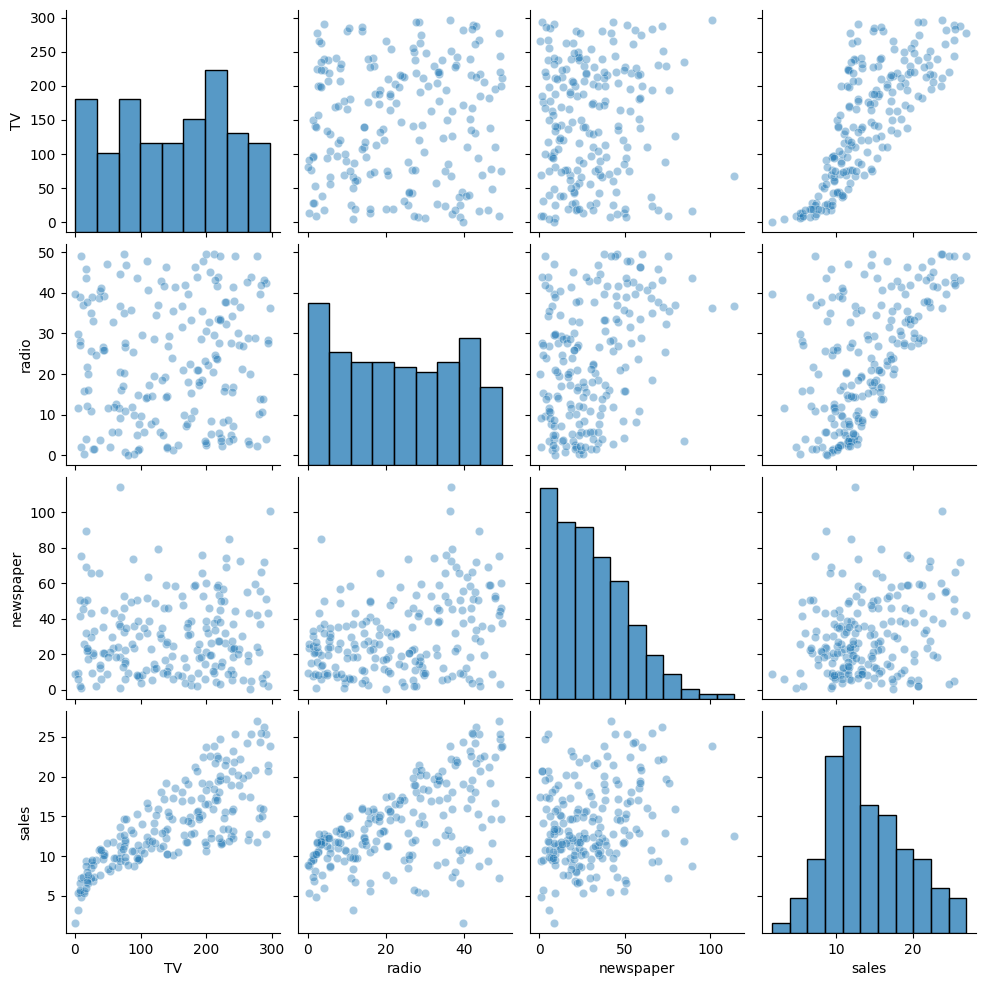

In [9]:
# EDA
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.4})

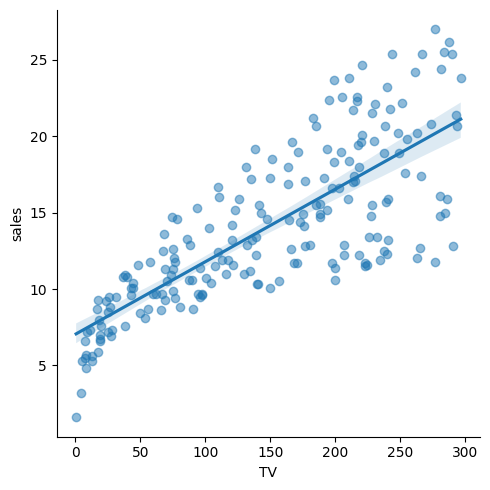

In [10]:
sns.lmplot(x="TV", y="sales", data=df, scatter_kws={"alpha": 0.5})

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
x=df[["TV"]]
y=df["sales"]

In [13]:
print("X shape:", x.shape)
print("y shape:", y.shape)


X shape: (200, 1)
y shape: (200,)


In [14]:

x_train,x_test,y_train,y_test=train_test_split(x,y.values.ravel(),test_size=0.2,random_state=42)

print("X shape:", x.shape)
print("y shape:", y.shape)
y_train



X shape: (200, 1)
y shape: (200,)


array([11. , 12.8, 10.1,  9.7, 11.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6,
       11.7,  7.2,  6.6,  9.4, 11. , 10.9, 25.4,  7.6, 11.7, 15. , 15.5,
       11.9,  9.2, 12.8,  6.6, 20.7,  6.7, 11.2,  9.5, 10.7,  8.8, 14.9,
       17.1, 15.9, 15.9, 15. , 20.7, 11.7, 21.8,  9.3, 14.2, 10.6, 17.3,
        9.9, 15.2, 13.3, 25.4, 10.8, 24.2,  5.6, 19.2, 23.8, 17.4, 17.4,
       17.3, 12.9, 11.8, 15.9, 15.5, 12.9,  9.6, 20.1, 10.3, 19.8, 11.4,
        8.6, 15.7, 14.1, 13.2,  8. , 22.1, 25.5, 19. , 18.3, 15.2, 18. ,
        8.5, 18. , 18.9, 16.6,  5.3,  3.2, 15.3, 12. , 15.5, 17.6, 25.4,
       12.3, 21.5, 17.1, 23.2, 11.5, 15.6, 12.9,  9.6, 18.5, 19.2, 21.2,
       19.6, 10.5, 11.8, 22.6,  9.7, 11.8,  9.5, 13.2, 13.4,  7.3, 13.6,
       20.2, 12.2, 16.7,  4.8,  9.7, 18.4, 14.5, 12.7, 24.4,  8.8, 27. ,
       10.8, 12.2, 26.2, 14. , 20.2,  8.7, 11.4,  9.7, 23.8, 14.8, 12.9,
       12.5, 13.2, 14.4,  5.9,  9.7, 14.7, 10.1, 19.6, 10.4, 22.6, 10.1,
        1.6, 11.6, 14.7, 17.2, 12.2, 16. , 17. ,  7

In [15]:
#Training the model
from sklearn.linear_model import LinearRegression

In [16]:
ln=LinearRegression()

In [17]:
ln.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
ln.coef_

array([0.04652973])

In [19]:
cdf = pd.DataFrame(ln.coef_.flatten(), x.columns, columns=['coef'])
print(cdf)

       coef
TV  0.04653


In [20]:
#Predictions on the data
predictions=ln.predict(x_test)
predictions


array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

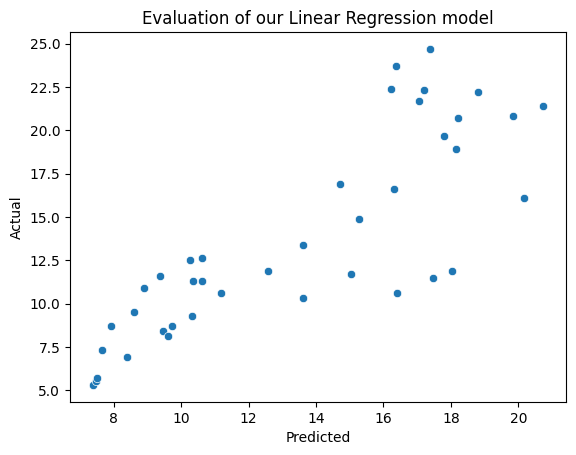

In [22]:
sns.scatterplot(x=predictions.flatten(), y=y_test.flatten())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Evaluation of our Linear Regression model")
plt.show()

In [23]:
#Validate with other measurements
#Mean Squared Error
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [24]:
print("Mean Absolute Error:",mean_absolute_error(y_test,predictions))
print("Mean square Error:",mean_squared_error(y_test,predictions))
print("RMS Error:",math.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error: 2.444420003751042
Mean square Error: 10.204654118800956
RMS Error: 3.194472431998898


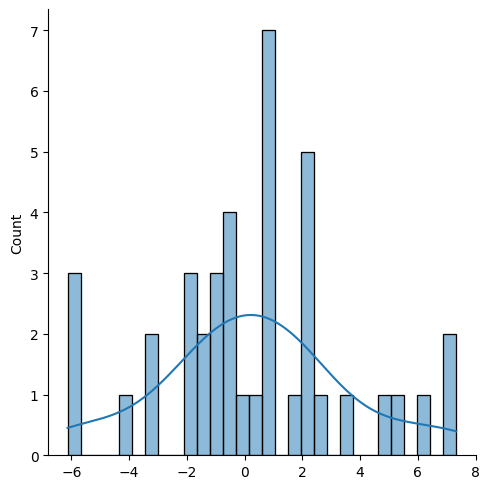

In [25]:
#Analyze the residuals
residuals=y_test-predictions
sns.displot(residuals,bins=30,kde=True)